In [226]:
# type your code here
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

#### 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

In [335]:
fifa_df = pd.read_csv('fifa_stats.csv')
fifa_df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [336]:
# Checking missing values in each column

missing_data = pd.DataFrame({'total_missing': fifa_df.isnull().sum(), 
                             'perc_missing': (fifa_df.isnull().sum() / len(fifa_df)) * 100})

missing_data

,total_missing,perc_missing
Name,0,0.00
Age,0,0.00
Nationality,0,0.00
Overall_rating,0,0.00
Potential,0,0.00
Club,19,0.95
Preferred Foot,0,0.00
International Reputation,0,0.00
Weak Foot,0,0.00
Skill Moves,0,0.00


In [337]:
# Dropping rows with missing data as the total percentage of missing data is less than 10% 

df = fifa_df.dropna()
len(df) 
print("The percentage of data reduction is: ",((len(fifa_df) - len(df)) / len(fifa_df)) * 100)
print("The percentage of data remaining after dropping rows with missing values is:", 100 - ((len(fifa_df) - len(df)) / len(fifa_df)) * 100)

The percentage of data reduction is:  0.95
The percentage of data remaining after dropping rows with missing values is: 99.05


In [338]:
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


##### a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size


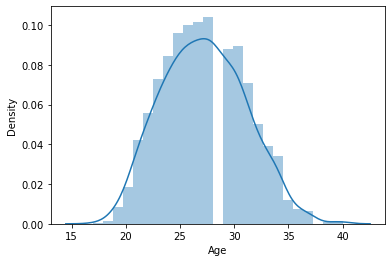

In [239]:
sns.distplot(df['Age'])
plt.show()                       # slightly right skewed data

In [267]:
sample_size= 200
no_of_samples= 3000 
sample_mean_list= [] 

for i in range(no_of_samples): 
    sample= np.random.choice(df['Age'], size= sample_size, replace= True) 
    sample_mean= np.mean(sample) 
    sample_mean_list.append(sample_mean)

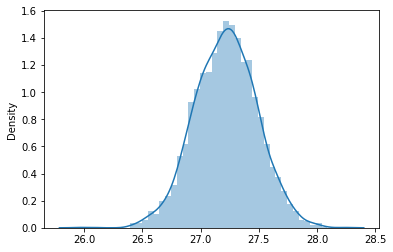

In [268]:
sns.distplot(sample_mean_list)
plt.show()

In [273]:
sigma = df['Age'].std() 
n = 3000 

print("Standard error:", sigma/(n**0.5))
print("Mean of sampling distribution:", np.mean(sample_mean_list))
print() 
print("Population mean:", df['Age'].mean())
print("Population standard deviation:", df['Age'].std())

Standard error: 0.07033704467533643
Mean of sampling distribution: 27.216426666666667

Population mean: 27.215547703180214
Population standard deviation: 3.8525185996930396


##### b) Is there any evidence that the players overall rating is greater than 80?

In [289]:
# Test of Normality of data: 

# Hypothesis formation for Shapiro test:
# Ho: skew = 0 (Data is normal) 
# Ha: skew != 0 (Data is not normal) 
print("Shapiro test on Overall rating sample:\n",stats.shapiro(df['Overall_rating']),'\n\n')

# Inference: 
# pValue (0) < 0.05 significance value. 
# Hence, Ha can be selected and so data is not normal





# Hence, transformation process can be applied on 'Overall Rating' feature to bring the distribution close to normal. 
# BoxCox transformation: 
tr, lam = stats.boxcox(df['Overall_rating'])
print("Transformed values:", tr)
print("Lambda/power value:", lam,'\n\n') 

# Since, we have the transformed values, the claimed mean (mu = 80) is transformed based on the same lambda value.
mu = np.power(80, lam)
print("After transforming the claimed population mean value, mu:", mu,'\n\n') 






# Hypothesis formation for Shapiro test after transformation:
# Ho: skew = 0 (Data is normal) 
# Ha: skew != 0 (Data is not normal) 
print("Shapiro test on transformed Overall Rating sample:\n",stats.shapiro(tr))

# Inference: 
# pValue (1.0) > 0.05 significance value. 
# Hence, Ho can be selected and so now data is normal

Shapiro test on Overall rating sample:
 ShapiroResult(statistic=0.8532959818840027, pvalue=1.721150444000814e-39) 


Transformed values: [0.07016879 0.07016879 0.07016879 ... 0.07016879 0.07016879 0.07016879]
Lambda/power value: -14.251349344860774 


After transforming the claimed population mean value, mu: 7.557875971848567e-28 


Shapiro test on transformed Overall Rating sample:
 ShapiroResult(statistic=1.0, pvalue=1.0)


In [291]:
# Hypothesis Formation for One Sample t test:
# Ho: mu = 0
# Ha: mu != 0 



# Choosing the right test:
# 1) Data is normal.
# 2) Population standard deviation is not known.

# Hence, One sample t test can be applied. 




# Test Statistics:
x_bar = np.mean(tr) 
s = np.std(tr, ddof= 1)
n = len(tr) 
mu = 0 

t = (x_bar - mu) / (s/n**0.5)
print("Test statistics value, t: ", t)



# pValue
pval = stats.t.sf(abs(t), df = n-1) * 2 
print("Probability value, pValue: ", pval)

Test statistics value, t:  inf
Probability value, pValue:  0.0


##### c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [293]:
df['Preferred Foot'].value_counts()

Right    1519
Left      462
Name: Preferred Foot, dtype: int64

In [297]:
rfoot_pot = df[df['Preferred Foot'] == 'Right']['Potential'] 
lfoot_pot = df[df['Preferred Foot'] == 'Left']['Potential'] 

In [305]:
# Test of Normality of data: 

# Hypothesis formation for Shapiro test:
# Ho: skew = 0 (Data is normal) 
# Ha: skew != 0 (Data is not normal) 
print("Shapiro test on rfoot_pot sample:\n",stats.shapiro(rfoot_pot))
print("Shapiro test on lfoot_pot sample:\n",stats.shapiro(lfoot_pot),'\n\n')

# Inference: 
# pValue of both samples (0, 0) < 0.05 significance value. 
# Hence, Ha can be selected and so data is not normal 





# Hence, transformation process can be applied on both samples to bring the distribution close to normal. 
# BoxCox transformation: 
tr1, lam1 = stats.boxcox(rfoot_pot)
tr2, lam2 = stats.boxcox(lfoot_pot)





# Hypothesis formation for Shapiro test after transformation:
# Ho: skew = 0 (Data is normal) 
# Ha: skew != 0 (Data is not normal) 
print("Shapiro test on transformed rfoot_pot sample:\n",stats.shapiro(tr1))
print("Shapiro test on transformed lfoot_pot sample:\n",stats.shapiro(tr2))


# Inference: 
# pValue (1.0) > 0.05 significance value. 
# Hence, Ho can be selected and so now data is normal

Shapiro test on rfoot_pot sample:
 ShapiroResult(statistic=0.9373535513877869, pvalue=8.425229710834448e-25)
Shapiro test on lfoot_pot sample:
 ShapiroResult(statistic=0.9437844157218933, pvalue=3.187897645515192e-12) 


Shapiro test on transformed rfoot_pot sample:
 ShapiroResult(statistic=1.0, pvalue=1.0)
Shapiro test on transformed lfoot_pot sample:
 ShapiroResult(statistic=1.0, pvalue=1.0)


In [306]:
# Hypothesis Formation: 
# Ho: mu1 (average potential of right foot prefered players) = mu2 (average potential of left foot prefered players) 
# Ha: mu1 (average potential of right foot prefered players) != mu2 (average potential of left foot prefered players)

# Ho: mu1 - m2 = 0
# Ha: mu1 - mu2 != 0



# Choosing the right test 
# 1) Data is normal 
# 2) Population standard deviation is not known 
# 3) Data is unpaired

# Hence, Two sample unpaired  t test can be applied. 




# Test Statistics: 
x1_bar = np.mean(tr1) 
x2_bar = np.mean(tr2)
s1 = np.std(tr1, ddof=1) 
s2 = np.std(tr2, ddof=1)
n1 = len(tr1) 
n2 = len(tr2) 
df1 = n1 - 1
df2 = n2 - 1 
df_tot = df1 + df2 


sp_var = ((df1 * s1**2) + (df2 * s2**2)) / df_tot

num = (x1_bar - x2_bar) - 0 
den = np.sqrt(sp_var * (1/n1 + 1/n2))

t = num / den
print("Test statistics value, t: ", t)




# pValue:
pval = stats.t.sf(abs(t), df = df_tot) * 2 
print("Probability value, pValue: ", pval)

Test statistics value, t:  -29241418708.931744
Probability value, pValue:  0.0


##### d) Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [309]:
df[['Overall_rating','Potential']].corr()

,Overall_rating,Potential
Overall_rating,1.000000,0.732086
Potential,0.732086,1.000000


In [311]:
# Based on the analysis, we could see that the data of Overall_rating and Potential do not follow normality. 
# Hence we transform the data to bring the data closer to normal distribution using BoxCox transformation.

# BoxCox transformation: 
tr1, lam1 = stats.boxcox(df['Overall_rating'])
tr2, lam2 = stats.boxcox(df['Potential'])




# Hypothesis formation for Shapiro test after transformation:
# Ho: skew = 0 (Data is normal) 
# Ha: skew != 0 (Data is not normal) 
print("Shapiro test on transformed Overall Rating sample:\n",stats.shapiro(tr1),'\n')
print("Shapiro test on transformed Potential sample:\n",stats.shapiro(tr2))

# Inference: 
# pValue (1.0) > 0.05 significance value. 
# Hence, Ho can be selected and so now data is normal

Shapiro test on transformed Overall Rating sample:
 ShapiroResult(statistic=1.0, pvalue=1.0) 

Shapiro test on transformed Potential sample:
 ShapiroResult(statistic=1.0, pvalue=1.0)


In [313]:
# Hypothesis formation for Pearson r Correlation: 
# Ho : corr = 0 (no relation)
# Ha : corr != 0 (relation exists) 


# Choosing the right test: 
# 1) Data should follow normal distribution. 

stats.pearsonr(np.array(tr1), np.array(tr2))

(nan, nan)

##### e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [320]:
df['Skill Moves'].value_counts()

3    818
4    540
2    392
1    192
5     39
Name: Skill Moves, dtype: int64

In [339]:
# Based on previous analysis, since Overall_rating does not follow normality, BoxCox transformation is applied.

tr, lam = stats.boxcox(df['Overall_rating'])

In [343]:
df['tr_Overall_Rating'] = pd.Series(tr)

In [346]:
sk1_rating = df[df['Skill Moves'] == 1]['tr_Overall_Rating']
sk2_rating = df[df['Skill Moves'] == 2]['tr_Overall_Rating']
sk3_rating = df[df['Skill Moves'] == 3]['tr_Overall_Rating']
sk4_rating = df[df['Skill Moves'] == 4]['tr_Overall_Rating']
sk5_rating = df[df['Skill Moves'] == 5]['tr_Overall_Rating']

In [352]:
# Test of Normality of data: 

# Hypothesis formation for Shapiro test on trasformed Overall_rating sample:
# Ho: skew = 0 (Data is normal) 
# Ha: skew != 0 (Data is not normal) 
print("Shapiro test on sk1_rating sample:\n",stats.shapiro(sk1_rating))
print("Shapiro test on sk2_rating sample:\n",stats.shapiro(sk2_rating))
print("Shapiro test on sk3_rating sample:\n",stats.shapiro(sk3_rating))
print("Shapiro test on sk4_rating sample:\n",stats.shapiro(sk4_rating))
print("Shapiro test on sk5_rating sample:\n",stats.shapiro(sk5_rating)) 

# Inference: 
# pValue (1.0) > 0.05 significance value 
# Hence, Ho can be selected and so now data is normal 




# Test for equality of variance: 

# Hypothesis formation for Levene test: 
# Ho: All variances are equal
# Ha: Atleast one variance is different 
print()
print("Test of variance for all five skill moves samples:\n", stats.levene(sk1_rating, sk2_rating, sk3_rating, sk4_rating, sk5_rating)) 

# Inference: 
# pValue of Levene test of overall rating for each skill move is returned as 'Nan'.
# Hence, Ha is selected and so atleast one variance is different.

Shapiro test on sk1_rating sample:
 ShapiroResult(statistic=nan, pvalue=1.0)
Shapiro test on sk2_rating sample:
 ShapiroResult(statistic=nan, pvalue=1.0)
Shapiro test on sk3_rating sample:
 ShapiroResult(statistic=nan, pvalue=1.0)
Shapiro test on sk4_rating sample:
 ShapiroResult(statistic=nan, pvalue=1.0)
Shapiro test on sk5_rating sample:
 ShapiroResult(statistic=nan, pvalue=1.0)

Test of variance for all five skill moves samples:
 LeveneResult(statistic=nan, pvalue=nan)


In [361]:
# Hypothesis for ANOVA: 
# Ho: All means are equal (no relation) 
# Ha: Atleast one mean is different (relation exists) 


# Choosing the right test: 
# 1) Data is normal 
# 2) All variances are different. 

# Hence, One Way Anova test cannot be applied.

F_onewayResult(statistic=nan, pvalue=nan)

#### 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed.

In [227]:
phone_df = pd.read_csv('phone.csv')
phone_df.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [228]:
phone_df.info()       # There are no missing values in the given dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [229]:
## Converting datatype of column 'date':

phone_df['date'] = pd.to_datetime(phone_df['date'])

In [230]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          820 non-null    datetime64[ns]
 1   duration      820 non-null    float64       
 2   item          820 non-null    object        
 3   month         820 non-null    object        
 4   network       820 non-null    object        
 5   network_type  820 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 38.6+ KB


##### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [231]:
n= len(phone_df['duration']) 
s= phone_df['duration'].std() 
x_bar= phone_df['duration'].mean()

conf_lvl= 0.95         # 95%

t= stats.t.isf((1-0.95)/2, df= n-1)
l1= x_bar - (t * (s/(n**0.5)))
u1= x_bar + (t * (s/(n**0.5)))
print("The range estimate of average duration calls made by all the networks with confidence of 95% is:\n",l1,"and",u1)

The range estimate of average duration calls made by all the networks with confidence of 95% is:
 141.17321160796186 and 147.43665951170905


In [232]:
n= len(phone_df['duration']) 
s= phone_df['duration'].std() 
x_bar= phone_df['duration'].mean()

conf_lvl= 0.99         # 95%

t= stats.t.isf((1-0.99)/2, df= n-1)
l1= x_bar - (t * (s/(n**0.5)))
u1= x_bar + (t * (s/(n**0.5)))
print("The range estimate of average duration calls made by all the networks with confidence of 99% is:\n",l1,"and",u1)

The range estimate of average duration calls made by all the networks with confidence of 99% is:
 140.185636073024 and 148.4242350466469


##### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [172]:
phone_df['network'].value_counts()

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [173]:
obs_cnt = np.array([215, 215, 150, 87, 84, 42, 27])

exp_cnt = np.array([len(phone_df['network'])/7 for i in phone_df['network'].unique()])

In [174]:
# Hypothesis formation 

# Ho: observed = expected 
# Ha: observed != expected  

stats.chisquare(f_exp= exp_cnt, f_obs= obs_cnt)

Power_divergenceResult(statistic=307.409756097561, pvalue=2.112592760257685e-63)

##### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

In [175]:
phone_df['network'].value_counts()

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [176]:
dur_three = phone_df[phone_df['network'] == 'Three']['duration']
dur_vod = phone_df[phone_df['network'] == 'Vodafone']['duration']
dur_data = phone_df[phone_df['network'] == 'data']['duration']
dur_met = phone_df[phone_df['network'] == 'Meteor']['duration']
dur_tesco = phone_df[phone_df['network'] == 'Tesco']['duration']
dur_land = phone_df[phone_df['network'] == 'landline']['duration']
dur_voice = phone_df[phone_df['network'] == 'voicemail']['duration']

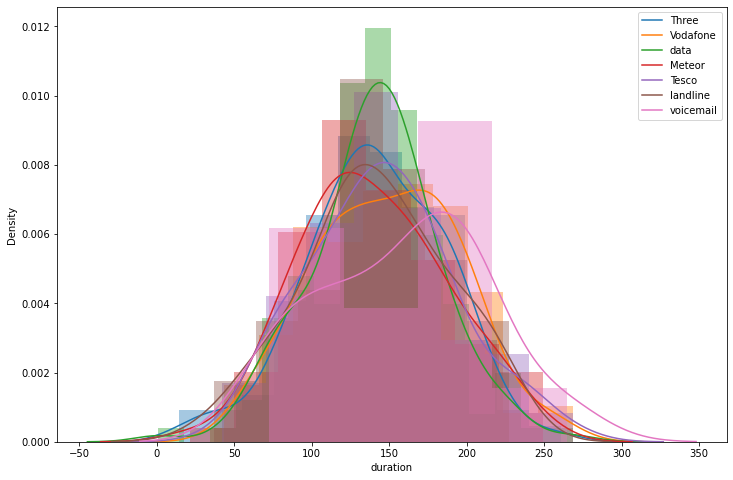

In [177]:
plt.figure(figsize= (12,8))
sns.distplot(dur_three)
sns.distplot(dur_vod)
sns.distplot(dur_data)
sns.distplot(dur_met)
sns.distplot(dur_tesco)
sns.distplot(dur_land)
sns.distplot(dur_voice) 
plt.legend(['Three', 'Vodafone', 'data', 'Meteor', 'Tesco', 'landline', 'voicemail'])
plt.show()

##### d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [178]:
phone_df['item'].value_counts()

call    388
sms     282
data    150
Name: item, dtype: int64

In [179]:
duration_call = phone_df[phone_df['item'] == 'call']['duration']
duration_sms = phone_df[phone_df['item'] == 'sms']['duration']
duration_data = phone_df[phone_df['item'] == 'data']['duration']

In [202]:
# Test of Normality:  

# Hypothesis formation for Shapiro test: 
# Ho: skew = 0 (Data is normal)
# Ha: skew != 0 (Data is not normal)
print("Shapiro test for sample - duration_call:\n", stats.shapiro(duration_call),'\n')
print("Shapiro test for sample - duration_sms:\n", stats.shapiro(duration_sms),'\n')
print("Shapiro test for sample - duration_data:\n", stats.shapiro(duration_data),'\n\n\n')

# Inference: 
# pValue of Shapiro test of duration data for each item (0.78, 0.37, 0.48) > significance value (0.05).
# Hence, Ho is selected and so Data is normal.




# Test for equality of variance: 

# Hypothesis formation for Levene test: 
# Ho: All variances are equal
# Ha: Atleast one variance is different 
print()
print("Test of variance for all three sample items:\n", stats.levene(duration_call, duration_sms, duration_data),'\n\n') 

# Inference: 
# pValue of Levene test of duration data for each item (0.032) < significance value (0.05).
# Hence, Ha is selected and so atleast one variance is different. 

#### Determining which variance is different:
print()
print("Levene test for - duration_call & duration_sms:\n",stats.levene(duration_call, duration_sms),'\n')
print("Levene test for - duration_sms & duration_data:\n",stats.levene(duration_sms, duration_data),'\n')
print("Levene test for - duration_call & duration_data:\n",stats.levene(duration_call, duration_data),'\n\n\n') 

# Inference: 
# pValue of Levene test for - duration_call & duration_sms > significance value (0.05). 
# Hence, in this case we can select null Hypothesis Ho. 
# Thus, we infer that only the variance for samples - duration_call & duration_sms are equal.




# Hypothesis formation for ANOVA:
# Ho: All means are equal (no relation)
# Ha: Atleast one mean is different (relation exists)

# Conditions for Anova: 
# 1) Data is normal 
# 2) Data has equal variance only for samples - duration_call & duration_sms

# Inference: 
# Hence, one - way ANOVA can be applied only on samples - duration_call & duration_sms. 

print()
print("ANOVA result for - duration_call & duration_sms:\n", stats.f_oneway(duration_call, duration_sms))

Shapiro test for sample - duration_call:
 ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708) 

Shapiro test for sample - duration_sms:
 ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526) 

Shapiro test for sample - duration_data:
 ShapiroResult(statistic=0.9912639856338501, pvalue=0.48521795868873596) 




Test of variance for all three sample items:
 LeveneResult(statistic=3.4300976447008478, pvalue=0.03285087780533987) 



Levene test for - duration_call & duration_sms:
 LeveneResult(statistic=0.1986118328972824, pvalue=0.6559880731498395) 

Levene test for - duration_sms & duration_data:
 LeveneResult(statistic=6.5802914126186565, pvalue=0.010649597357420926) 

Levene test for - duration_call & duration_data:
 LeveneResult(statistic=4.997795914374391, pvalue=0.02579057825683839) 




ANOVA result for - duration_call & duration_sms:
 F_onewayResult(statistic=2.772571885758172, pvalue=0.09636087255994416)


##### e) Perform statistical tests to identify the relation between network and network_type. 

In [203]:
# Hypothesis formation: 
# Ho: Network and Network-type are not related. 
# Ha: Network and Network-type are related.    

obs = pd.crosstab(phone_df['network'], phone_df['network_type'])
obs

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [206]:
test_stat, pval, dof, exp = stats.chi2_contingency(obs)

print("Test Statistics: ", test_stat,'\n')
print("pValue: ", pval,'\n') 
print("Degrees of freedom: ", dof,'\n') 
print("Expected: ", exp)

Test Statistics:  2460.0 

pValue:  0.0 

Degrees of freedom:  18 

Expected:  [[ 15.91463415   4.45609756  63.76463415   2.86463415]
 [ 15.36585366   4.30243902  61.56585366   2.76585366]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 27.43902439   7.68292683 109.93902439   4.93902439]
 [  7.68292683   2.15121951  30.78292683   1.38292683]
 [  4.93902439   1.38292683  19.78902439   0.88902439]]
